<a href="https://www.kaggle.com/code/shedai/intro-textprocesing?scriptVersionId=248430319" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Basit Text Processing Kavramları

## 1.1. Regular Expressions 

In [2]:
import re 
s = "Turkcell"

match = re.search("cell", s) 

print("Start Index:", match.start()) 
print("End Index:", match.end()) 

Start Index: 4
End Index: 8


In [3]:
import re 
s = "fljasf@fljasdf.com"
match = re.search("^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5})", s) 
print("Start Index:", match.start()) 
print("End Index:", match.end()) 

Start Index: 0
End Index: 18


In [4]:
import re
regex = r"([a-zA-Z]+) (\d+)"

match = re.search(regex, "I was born on June 24")
if match != None:
    print ("Match at index %s, %s" % (match.start(), match.end()))
    print ("Full match: %s" % (match.group(0)))
    print ("Month: %s" % (match.group(1)))
    print ("Day: %s" % (match.group(2)))

else: 
    print ("The regex pattern does not match.")

Match at index 14, 21
Full match: June 24
Month: June
Day: 24


## 1.2. Web Scrapping ve Regular Expression

In [5]:
import nltk
from bs4 import BeautifulSoup
from urllib.request import urlopen
raw = urlopen("https://www.turkcellesirket.com/destek-merkezi").read()

raw1 = BeautifulSoup(raw)
raw2 = raw1.get_text()
#print(raw2)

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("^([a-zA-Z0-9_\-\.]+)@([a-zA-Z0-9_\-\.]+)\.([a-zA-Z]{2,5}).([a-zA-Z]{2,5})")
tokenizer.tokenize(raw2)


[('destek', 'eplatform', 'com', 'tr')]

## 1.3. Vector Kavramı ve Count Vectorizer

In [6]:
# creating the feature matrix 
from sklearn.feature_extraction.text import CountVectorizer
# corpus, külliyat, derlem
ans = "Turkcell ile bağlan hayata"
ans2 = "Turkcell ile dünyalar senin olsun"
ans3 = "Turkcell ile Turkcell calisiyor"
ans4 = "cok Turkcell hareketler"
matrix = CountVectorizer(max_features=1000)
X = matrix.fit_transform([ans,ans2,ans3,ans4]).toarray()
print(X)
X2 = matrix.transform(["Turkcelli cok seviyorum"]).toarray()
print(X2)

print(matrix.get_feature_names_out())

[[1 0 0 0 0 1 1 0 0 1]
 [0 0 0 1 0 0 1 1 1 1]
 [0 1 0 0 0 0 1 0 0 2]
 [0 0 1 0 1 0 0 0 0 1]]
[[0 0 1 0 0 0 0 0 0 0]]
['bağlan' 'calisiyor' 'cok' 'dünyalar' 'hareketler' 'hayata' 'ile' 'olsun'
 'senin' 'turkcell']


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Örnek veri kümesi (pozitif ve negatif cümleler)
# Corpus / külliyat / derlem
texts = [
    "I love this product",       # pozitif
    "This is an amazing movie",  # pozitif
    "I am very happy with the service",  # pozitif
    "I hate this thing",         # negatif
    "This is the worst experience ever", # negatif
    "I am not happy with this",  # negatif
    "I feel wonderful", #positif
    "I love the product", #positif
    "Great this product is awesome", #positif
    "Great I hate this product"  #negatif
]
labels = [1, 1, 1, 0, 0, 0, 1, 1, 1,0]  # 1 = pozitif, 0 = negatif

# Metinleri vektöre çevir
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
# Veri setini eğitim/test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# Lojistik regresyon modeli
model = LogisticRegression()
model.fit(X_train, y_train)

# Tahmin yap ve sonucu değerlendir
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Yeni metinleri tahmin et
new_texts = ["I love the experience", "I feel terrible", "What a wonderful day", "This is not good"]
new_X = vectorizer.transform(new_texts)
predictions = model.predict(new_X)

# Sonuçları göster
for text, label in zip(new_texts, predictions):
    sentiment = "Pozitif" if label == 1 else "Negatif"
    print(f"'{text}' -> {sentiment}")

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       1.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       3.0
   macro avg       0.00      0.00      0.00       3.0
weighted avg       0.00      0.00      0.00       3.0

'I love the experience' -> Pozitif
'I feel terrible' -> Pozitif
'What a wonderful day' -> Pozitif
'This is not good' -> Negatif


In [8]:
X.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        0],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
        1],
       [1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
        0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
        0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
        0]])

In [9]:
print(vectorizer.get_feature_names_out())

['am' 'amazing' 'an' 'awesome' 'ever' 'experience' 'feel' 'great' 'happy'
 'hate' 'is' 'love' 'movie' 'not' 'product' 'service' 'the' 'thing' 'this'
 'very' 'with' 'wonderful' 'worst']


## 1.4. Örnek : Sentiment Polarity

In [10]:
from textblob import TextBlob

# İngilizce örnekler
texts = [
    "I love this product",
    "This is terrible",
    "What a great day!",
    "I hate this",
    "It's okay, not bad",
    "Great it does not work",
    "I feel terrible"
]

print("Sentiment Analizi (TextBlob):")
for text in texts:
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    label = "Pozitif" if polarity > 0 else "Negatif" if polarity < 0 else "Nötr"
    print(f"'{text}' -> {label} ({polarity:.2f})")

Sentiment Analizi (TextBlob):
'I love this product' -> Pozitif (0.50)
'This is terrible' -> Negatif (-1.00)
'What a great day!' -> Pozitif (1.00)
'I hate this' -> Negatif (-0.80)
'It's okay, not bad' -> Pozitif (0.42)
'Great it does not work' -> Pozitif (0.80)
'I feel terrible' -> Negatif (-1.00)


## 1.5. İlk Transformer Denemesi ve Sentiment Polarity

In [11]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import torch

# 1. Hızlı prototipleme için pipeline kullanımı
classifier = pipeline("sentiment-analysis", model="dbmdz/bert-base-turkish-cased")

# 2. Örnek cümle
text = "satın aldığım ürün çok başarılı ve çok memnunum"
#"Great it does not work" #chain of thought, reasoning
# "I hate to hurt someone"
# hurt someone (action) -> sentiment

# 3. Tahmin yap
result = classifier(text)
print("Sentiment Prediction:", result)

# 4. Alternatif olarak model ve tokenizer'ı doğrudan yükle (gelişmiş kullanım)
tokenizer = AutoTokenizer.from_pretrained("dbmdz/bert-base-turkish-cased")
model = AutoModelForSequenceClassification.from_pretrained("dbmdz/bert-base-turkish-cased")

# 5. Tokenleştirme ve Tensor'a dönüştürme
inputs = tokenizer(text, return_tensors="pt")

# 6. Modelin tahmin çıktısını alma
with torch.no_grad():
    logits = model(**inputs).logits
    probabilities = torch.nn.functional.softmax(logits, dim=1)

# 7. Sonuçları yazdırma
labels = ["NEGATIVE", "POSITIVE"]
predicted_label = labels[probabilities.argmax()]
print(f"Detailed Prediction: {predicted_label} ({probabilities.max().item()*100:.2f}%)")


2025-07-02 05:39:31.231387: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751434771.557143      13 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751434771.659613      13 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

Device set to use cpu


Sentiment Prediction: [{'label': 'LABEL_0', 'score': 0.762820303440094}]


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at dbmdz/bert-base-turkish-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Detailed Prediction: POSITIVE (71.14%)


# 2. Embedding Kavramı

## 2.1.  CBOW ve Skip-Gram 

### 2.1.1 Kurulum Hazırlığı

In [12]:
import numpy as np

# --- ORTAK KURULUM ---
print("--- GENEL KURULUM BAŞLIYOR ---")
# Basit bir metin korpusu oluşturalım.
# İlişkili kelimeler (kral-adam, kraliçe-kadın) var.
corpus_text = "kral, güçlü bir adamdır. kraliçe, bilge bir kadındır. adam, kral ile yaşar. kadın, kraliçe ile yaşar."
corpus = corpus_text.lower().replace('.', '').replace(',', '').split()

print(f"Metin Korpusu: {corpus}\n")

# Kelime dağarcığı (vocabulary) oluşturma
vocab = sorted(list(set(corpus)))
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}
vocab_size = len(vocab)

print(f"Kelime Dağarcığı (Vocabulary): {vocab}")
print(f"Kelime -> Index Sözlüğü: {word_to_ix}")
print(f"Vocabulary Boyutu: {vocab_size}\n")

# Model hiperparametreleri
embedding_dim = 10  # Her kelimeyi temsil edecek vektörün boyutu
window_size = 2   # Bağlam penceresinin boyutu (hedef kelimenin sağı ve solundan kaç kelime alınacağı)

# Simülasyon için rastgele Embedding matrisleri (Gerçekte bunlar eğitimle öğrenilir)
# W1: Girdi -> Gizli Katman (Embedding'lerin tutulduğu yer)
# W2: Gizli Katman -> Çıktı
np.random.seed(42)
W1 = np.random.rand(vocab_size, embedding_dim)
W2 = np.random.rand(embedding_dim, vocab_size)

print("Simülasyon için rastgele W1 (Embedding) ve W2 (Çıktı) matrisleri oluşturuldu.")
print("="*60)

print('W1', W1)
print('W2', W2)

--- GENEL KURULUM BAŞLIYOR ---
Metin Korpusu: ['kral', 'güçlü', 'bir', 'adamdır', 'kraliçe', 'bilge', 'bir', 'kadındır', 'adam', 'kral', 'ile', 'yaşar', 'kadın', 'kraliçe', 'ile', 'yaşar']

Kelime Dağarcığı (Vocabulary): ['adam', 'adamdır', 'bilge', 'bir', 'güçlü', 'ile', 'kadın', 'kadındır', 'kral', 'kraliçe', 'yaşar']
Kelime -> Index Sözlüğü: {'adam': 0, 'adamdır': 1, 'bilge': 2, 'bir': 3, 'güçlü': 4, 'ile': 5, 'kadın': 6, 'kadındır': 7, 'kral': 8, 'kraliçe': 9, 'yaşar': 10}
Vocabulary Boyutu: 11

Simülasyon için rastgele W1 (Embedding) ve W2 (Çıktı) matrisleri oluşturuldu.
W1 [[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864 0.15599452
  0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497 0.18340451
  0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998 0.78517596
  0.19967378 0.51423444 0.59241457 0.04645041]
 [0.60754485 0.17052412 0.06505159 0.94888554 0.96563203 0.80839735
 

### 2.1.2 CBoW

In [13]:
# --- BÖLÜM 1: CBOW MODELİ SİMÜLASYONU ---
print("\n--- BÖLÜM 1: CBOW (Continuous Bag-of-Words) ---")
print(f"Amaç: ['çevre_kelime_1', 'çevre_kelime_2'] -> 'hedef_kelime' tahmin etmek.\n")

# Adım 1.1: CBOW için eğitim verisi oluşturma
# (Bağlam, Hedef) çiftleri oluşturulur.
cbow_data = []
for i in range(window_size, len(corpus) - window_size):
    context_indices = []
    # Sol pencere
    for j in range(window_size, 0, -1):
        context_indices.append(word_to_ix[corpus[i-j]])
    # Sağ pencere
    for j in range(1, window_size + 1):
        context_indices.append(word_to_ix[corpus[i+j]])
    
    target_index = word_to_ix[corpus[i]]
    cbow_data.append((context_indices, target_index))

print("Adım 1.1: CBOW için Eğitim Verisi Oluşturuldu (context_indices, target_index):")
print("Örnek Veriler:")
for context, target in cbow_data[:3]:
    context_words = [ix_to_word[ix] for ix in context]
    target_word = ix_to_word[target]
    print(f"   Bağlam: {context_words}  --->  Hedef: '{target_word}'")
print("...\n")


# Adım 1.2: Bir CBOW örneği için ileri yayılım (Forward Pass) simülasyonu
print("Adım 1.2: Tek bir örnek üzerinden CBOW'un çalışma mantığı:\n")
# Örnek alalım: (['kral', 'güçlü', 'bir', 'adamdır'], 'bir') -> hedef 'bir' olmasın, hedef 'adamdır', bağlam 'güçlü bir' olsun.
# Pencereyi 1 yapalım daha anlaşılır olsun
window_size_cbow = 1
# Yeni veri:
# (['güçlü', 'adamdır'], 'bir')
context_sample_ix = [word_to_ix['güçlü'], word_to_ix['adamdır']]
target_sample_ix = word_to_ix['bir']
context_sample_words = [ix_to_word[ix] for ix in context_sample_ix]
target_sample_word = ix_to_word[target_sample_ix]

print(f"Seçilen Örnek: Bağlam: {context_sample_words} -> Hedef: '{target_sample_word}'\n")

# 1. Bağlam kelimelerinin embedding vektörlerini W1 matrisinden al.
print("1. Bağlam kelimelerinin embedding vektörleri W1'den alınır.")
context_vectors = W1[context_sample_ix]
# print(f"   '{context_sample_words[0]}' vektörü: {np.round(context_vectors[0], 2)}")
# print(f"   '{context_sample_words[1]}' vektörü: {np.round(context_vectors[1], 2)}\n")

# 2. Bu vektörlerin ortalamasını alarak tek bir bağlam vektörü oluştur.
print("2. Bu vektörlerin ortalaması alınarak tek bir 'bağlam vektörü' (h) oluşturulur.")
context_vector_h = np.mean(context_vectors, axis=0)
# print(f"   Ortalama Bağlam Vektörü (h): {np.round(context_vector_h, 2)}\n")

# 3. Bu bağlam vektörünü W2 matrisi ile çarparak skorları elde et.
print("3. Bu ortalama vektör, W2 matrisi ile çarpılarak tüm kelimeler için skorlar üretilir.")
scores = np.dot(context_vector_h, W2)

# 4. Softmax ile skorları olasılıklara çevir.
print("\n4. Softmax fonksiyonu ile bu skorlar bir olasılık dağılımına dönüştürülür.")
probabilities = np.exp(scores) / np.sum(np.exp(scores))

# 5. Sonuç
print("\n5. Modelin amacı, eğitim sırasında W1 ve W2'yi güncelleyerek,")
print(f"doğru hedef kelime olan '{target_sample_word}' için bu olasılığı maksimize etmektir.")
print(f"   Modelin '{target_sample_word}' için ürettiği olasılık (eğitim öncesi): {probabilities[target_sample_ix]:.4f}")
print("="*60)


--- BÖLÜM 1: CBOW (Continuous Bag-of-Words) ---
Amaç: ['çevre_kelime_1', 'çevre_kelime_2'] -> 'hedef_kelime' tahmin etmek.

Adım 1.1: CBOW için Eğitim Verisi Oluşturuldu (context_indices, target_index):
Örnek Veriler:
   Bağlam: ['kral', 'güçlü', 'adamdır', 'kraliçe']  --->  Hedef: 'bir'
   Bağlam: ['güçlü', 'bir', 'kraliçe', 'bilge']  --->  Hedef: 'adamdır'
   Bağlam: ['bir', 'adamdır', 'bilge', 'bir']  --->  Hedef: 'kraliçe'
...

Adım 1.2: Tek bir örnek üzerinden CBOW'un çalışma mantığı:

Seçilen Örnek: Bağlam: ['güçlü', 'adamdır'] -> Hedef: 'bir'

1. Bağlam kelimelerinin embedding vektörleri W1'den alınır.
2. Bu vektörlerin ortalaması alınarak tek bir 'bağlam vektörü' (h) oluşturulur.
3. Bu ortalama vektör, W2 matrisi ile çarpılarak tüm kelimeler için skorlar üretilir.

4. Softmax fonksiyonu ile bu skorlar bir olasılık dağılımına dönüştürülür.

5. Modelin amacı, eğitim sırasında W1 ve W2'yi güncelleyerek,
doğru hedef kelime olan 'bir' için bu olasılığı maksimize etmektir.
   Modeli

## 2.1.3 Skip-Gram ile komşu tahmini

In [14]:
# --- BÖLÜM 2: SKIP-GRAM MODELİ SİMÜLASYONU ---
print("\n--- BÖLÜM 2: Skip-gram ---")
print(f"Amaç: 'hedef_kelime' -> ['çevre_kelime_1', 'çevre_kelime_2'] tahmin etmek.\n")

# Adım 2.1: Skip-gram için eğitim verisi oluşturma
# (Hedef, Bağlam_Kelimesi) çiftleri oluşturulur.
# Bir hedef kelime, birden çok eğitim örneği üretir.
skipgram_data = []
for i in range(window_size, len(corpus) - window_size):
    center_word_ix = word_to_ix[corpus[i]]
    # Sol ve sağ penceredeki her kelime için ayrı bir çift oluştur
    for j in range(window_size, 0, -1):
        context_word_ix = word_to_ix[corpus[i-j]]
        skipgram_data.append((center_word_ix, context_word_ix))
    for j in range(1, window_size + 1):
        context_word_ix = word_to_ix[corpus[i+j]]
        skipgram_data.append((center_word_ix, context_word_ix))

print("Adım 2.1: Skip-gram için Eğitim Verisi Oluşturuldu (hedef_index, context_index):")
print("Örnek Veriler:")
for center, context in skipgram_data[:5]:
    center_word = ix_to_word[center]
    context_word = ix_to_word[context]
    print(f"   Hedef: '{center_word}'  --->  Tahmin Edilecek Bağlam: '{context_word}'")
print("...\n")

# Adım 2.2: Bir Skip-gram örneği için ileri yayılım (Forward Pass) simülasyonu
print("Adım 2.2: Tek bir örnek üzerinden Skip-gram'in çalışma mantığı:\n")
# Örnek alalım: ('güçlü', 'kral')
center_sample_ix = word_to_ix['güçlü']
context_sample_ix = word_to_ix['kral']
center_sample_word = ix_to_word[center_sample_ix]
context_sample_word = ix_to_word[context_sample_ix]

print(f"Seçilen Örnek: Hedef: '{center_sample_word}' -> Tahmin Edilecek Bağlam: '{context_sample_word}'\n")

# 1. Hedef kelimenin embedding vektörünü W1 matrisinden al.
print("1. Hedef kelimenin embedding vektörü W1'den alınır.")
center_vector = W1[center_sample_ix]
# print(f"   '{center_sample_word}' vektörü: {np.round(center_vector, 2)}\n")

# 2. Bu vektörü W2 matrisi ile çarparak skorları elde et. (CBOW'dan farkı: ortalama yok!)
print("2. Bu tek vektör, W2 matrisi ile çarpılarak tüm kelimeler için skorlar üretilir.")
scores = np.dot(center_vector, W2)

# 3. Softmax ile skorları olasılıklara çevir.
print("\n3. Softmax fonksiyonu ile bu skorlar bir olasılık dağılımına dönüştürülür.")
probabilities = np.exp(scores) / np.sum(np.exp(scores))

# 4. Sonuç
print("\n4. Modelin amacı, eğitim sırasında W1 ve W2'yi güncelleyerek,")
print(f"doğru bağlam kelimesi olan '{context_sample_word}' için bu olasılığı maksimize etmektir.")
print(f"Bu işlem, '{center_sample_word}' kelimesinin tüm bağlam kelimeleri için tekrarlanır.")
print(f"   Modelin '{context_sample_word}' için ürettiği olasılık (eğitim öncesi): {probabilities[context_sample_ix]:.4f}")
print("="*60)


--- BÖLÜM 2: Skip-gram ---
Amaç: 'hedef_kelime' -> ['çevre_kelime_1', 'çevre_kelime_2'] tahmin etmek.

Adım 2.1: Skip-gram için Eğitim Verisi Oluşturuldu (hedef_index, context_index):
Örnek Veriler:
   Hedef: 'bir'  --->  Tahmin Edilecek Bağlam: 'kral'
   Hedef: 'bir'  --->  Tahmin Edilecek Bağlam: 'güçlü'
   Hedef: 'bir'  --->  Tahmin Edilecek Bağlam: 'adamdır'
   Hedef: 'bir'  --->  Tahmin Edilecek Bağlam: 'kraliçe'
   Hedef: 'adamdır'  --->  Tahmin Edilecek Bağlam: 'güçlü'
...

Adım 2.2: Tek bir örnek üzerinden Skip-gram'in çalışma mantığı:

Seçilen Örnek: Hedef: 'güçlü' -> Tahmin Edilecek Bağlam: 'kral'

1. Hedef kelimenin embedding vektörü W1'den alınır.
2. Bu tek vektör, W2 matrisi ile çarpılarak tüm kelimeler için skorlar üretilir.

3. Softmax fonksiyonu ile bu skorlar bir olasılık dağılımına dönüştürülür.

4. Modelin amacı, eğitim sırasında W1 ve W2'yi güncelleyerek,
doğru bağlam kelimesi olan 'kral' için bu olasılığı maksimize etmektir.
Bu işlem, 'güçlü' kelimesinin tüm bağla

## 2.1.4 CBoW ve Skip-Gram Birlikteliği

In [15]:
import gensim
from gensim.models import Word2Vec
import warnings
warnings.filterwarnings("ignore") # Gereksiz uyarıları gizle

# --- Adım 1: Örnek Metin Korpusu Hazırlama ---
print("--- Adım 1: Veri Hazırlığı ---")
# Metin verimiz, cümlelerin token'lara (kelimelere) ayrılmış bir listesi olmalı.
corpus_text = "kral, güçlü bir adamdır. kraliçe, bilge bir kadındır. adam, kral ile yaşar. kadın, kraliçe ile yaşar."
# Cümlelere ve kelimelere ayıralım
corpus = [gensim.utils.simple_preprocess(sentence) for sentence in corpus_text.split('.')]

print("Token'lara ayrılmış metin (liste içinde liste yapısı):")
for sentence in corpus:
    if sentence: # Boş listeleri atla
        print(f"   {sentence}")
print("\n")


# --- Adım 2: CBOW (sg=0) ile Model Eğitimi ---
print("="*60)
print("--- BÖLÜM 2: CBOW Modeli (sg=0 - Varsayılan) ---")

# Modeli oluştururken sg=0 parametresini belirtiyoruz (belirtmesek de varsayılan bu olurdu).
# vector_size: embedding boyutu
# window: bağlam penceresi
# min_count: kelimenin dikkate alınması için minimum geçme sayısı
# workers: eğitim için kullanılacak işlemci çekirdeği sayısı (tekrarlanabilirlik için 1)
cbow_model = Word2Vec(sentences=corpus, vector_size=100, window=2, min_count=1, sg=0, workers=1)

print("\nCBOW modeli başarıyla eğitildi.")
print("Şimdi CBOW modelinin öğrendiği ilişkileri test edelim:\n")

# 'kral' kelimesinin vektör temsilini alalım
try:
    vec_kral_cbow = cbow_model.wv['kral']
    print(f"'kral' kelimesinin CBOW vektörünün ilk 5 boyutu: {vec_kral_cbow[:5]}")
except KeyError:
    print("'kral' kelimesi sözlükte bulunamadı.")

# Benzerlik testi
try:
    similarity_cbow = cbow_model.wv.similarity('kral', 'adam')
    print(f"CBOW - Benzerlik('kral', 'adam'): {similarity_cbow:.4f}")
except KeyError:
    print("Test kelimelerinden biri sözlükte bulunamadı.")

# En benzer kelimeleri bulma
try:
    most_similar_cbow = cbow_model.wv.most_similar('kraliçe')
    print(f"CBOW - 'kraliçe' kelimesine en benzer kelimeler: {most_similar_cbow}")
except KeyError:
    print("'kraliçe' kelimesi sözlükte bulunamadı.")


# --- Adım 3: Skip-gram (sg=1) ile Model Eğitimi ---
print("\n" + "="*60)
print("--- BÖLÜM 3: Skip-gram Modeli (sg=1) ---")

# Bu sefer, diğer tüm parametreler aynı kalacak şekilde sg=1 olarak değiştiriyoruz.
skipgram_model = Word2Vec(sentences=corpus, vector_size=100, window=2, min_count=1, sg=1, workers=1)

print("\nSkip-gram modeli başarıyla eğitildi.")
print("Şimdi Skip-gram modelinin öğrendiği ilişkileri test edelim:\n")

# 'kral' kelimesinin vektör temsilini alalım
try:
    vec_kral_skipgram = skipgram_model.wv['kral']
    print(f"'kral' kelimesinin Skip-gram vektörünün ilk 5 boyutu: {vec_kral_skipgram[:5]}")
except KeyError:
    print("'kral' kelimesi sözlükte bulunamadı.")

# Benzerlik testi
try:
    similarity_skipgram = skipgram_model.wv.similarity('kral', 'adam')
    print(f"Skip-gram - Benzerlik('kral', 'adam'): {similarity_skipgram:.4f}")
except KeyError:
    print("Test kelimelerinden biri sözlükte bulunamadı.")

# En benzer kelimeleri bulma
try:
    most_similar_skipgram = skipgram_model.wv.most_similar('kraliçe')
    print(f"Skip-gram - 'kraliçe' kelimesine en benzer kelimeler: {most_similar_skipgram}")
except KeyError:
    print("'kraliçe' kelimesi sözlükte bulunamadı.")


# --- Adım 4: Sonuç ve Yorum ---
print("\n" + "="*60)
print("--- BÖLÜM 4: Sonuç ve Yorum ---")
print("Gördüğünüz gibi, aynı veri üzerinde, sadece `sg` parametresini değiştirerek iki farklı model eğittik.")
print("\nİki modelin ürettiği sonuçlar arasındaki farklar şunlardan kaynaklanır:")
print("- Farklı Algoritmalar: CBOW, bağlamın ortalamasını alarak daha 'yumuşak' ve genel bir temsil öğrenir.")
print("- Detay Seviyesi: Skip-gram, her (hedef, bağlam) kelime çiftini ayrı bir görev olarak ele aldığı için daha fazla veri üzerinde çalışır ve potansiyel olarak daha ince detayları ve nadir kelimelerin ilişkilerini yakalayabilir.")
print("\nPratikte Hangisi Seçilir?")
print("- Hız gerekliyse ve büyük bir veri setiniz varsa: CBOW (`sg=0`) genellikle daha hızlıdır.")
print("- Vektör kalitesi çok önemliyse veya veri setiniz küçükse/nadir kelimeler içeriyorsa: Skip-gram (`sg=1`) genellikle daha iyi sonuçlar verir.")
print("\nGensim, bu seçimi tek bir parametre ile kolayca yapmanızı sağlayarak büyük bir esneklik sunar.")

--- Adım 1: Veri Hazırlığı ---
Token'lara ayrılmış metin (liste içinde liste yapısı):
   ['kral', 'güçlü', 'bir', 'adamdır']
   ['kraliçe', 'bilge', 'bir', 'kadındır']
   ['adam', 'kral', 'ile', 'yaşar']
   ['kadın', 'kraliçe', 'ile', 'yaşar']


--- BÖLÜM 2: CBOW Modeli (sg=0 - Varsayılan) ---

CBOW modeli başarıyla eğitildi.
Şimdi CBOW modelinin öğrendiği ilişkileri test edelim:

'kral' kelimesinin CBOW vektörünün ilk 5 boyutu: [-0.00713902  0.00124103 -0.00717672 -0.00224462  0.0037193 ]
CBOW - Benzerlik('kral', 'adam'): 0.0348
CBOW - 'kraliçe' kelimesine en benzer kelimeler: [('bilge', 0.19912061095237732), ('kral', 0.17018885910511017), ('adam', 0.14595060050487518), ('kadın', 0.06408978253602982), ('kadındır', -0.0027540246956050396), ('bir', -0.013514937832951546), ('ile', -0.023671647533774376), ('adamdır', -0.03284316509962082), ('yaşar', -0.05234674736857414), ('güçlü', -0.10198419541120529)]

--- BÖLÜM 3: Skip-gram Modeli (sg=1) ---

Skip-gram modeli başarıyla eğitildi.
Şimdi

## 2.2. Word2Vec (Gensim) Basitleştirilmiş Örnek

In [16]:
from gensim.models import Word2Vec

# 1. Eğitim verisi: küçük ve sembolik bir metin kümesi
corpus = [
    ["king", "is", "a", "strong", "man"],
    ["queen", "is", "a", "wise", "woman"],
    ["man", "and", "woman", "are", "human"],
    ["king", "and", "queen", "rule", "the", "kingdom"],
    ["queen", "rules", "with", "wisdom"],
    ["man", "is", "mortal"],
    ["woman", "is", "mortal"],
    ["turkcell","ile","baglan","hayata"]
]

# 2. Word2Vec modelini eğit (skip-gram = sg=1)
model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)

# 3. Örnek: Benzer kelimeleri bulma
print("Benzer kelimeler (king):")
for word, score in model.wv.most_similar("king"):
    print(f"  {word:>8} → {score:.3f}")

# 4. Anlamsal çıkarım örneği: king - man + woman ≈ ?
print("\nAnlamsal Analojiler:")
for word, score in model.wv.most_similar(positive=["king", "woman"], negative=["man"]):
    print(f"  {word:>8} → {score:.3f}")

# 5. Örnek: Benzer kelimeleri bulma : turkcell
print("Benzer kelimeler (turkcell):")
for word, score in model.wv.most_similar("turkcell"):
    print(f"  {word:>8} → {score:.3f}")
'''
# 6. Örnek: Benzer kelimeleri bulma : turkcell
print("Benzer kelimeler (hascelik):")
for word, score in model.wv.most_similar("hascelik"):
    print(f"  {word:>8} → {score:.3f}")
'''

Benzer kelimeler (king):
     queen → 0.166
      rule → 0.154
       and → 0.137
     rules → 0.127
       man → 0.125
       are → 0.107
         a → 0.102
   kingdom → 0.040
  turkcell → 0.031
    baglan → -0.023

Anlamsal Analojiler:
       and → 0.218
       are → 0.132
      wise → 0.079
    baglan → 0.052
     queen → -0.001
       ile → -0.001
    hayata → -0.015
      rule → -0.020
      with → -0.034
         a → -0.076
Benzer kelimeler (turkcell):
    wisdom → 0.171
     rules → 0.166
       man → 0.160
       the → 0.081
     human → 0.075
      with → 0.063
         a → 0.036
      king → 0.031
        is → 0.012
      rule → 0.004


'\n# 6. Örnek: Benzer kelimeleri bulma : turkcell\nprint("Benzer kelimeler (hascelik):")\nfor word, score in model.wv.most_similar("hascelik"):\n    print(f"  {word:>8} → {score:.3f}")\n'

In [17]:
print('king', 'queen', model.wv.similarity('king', 'queen'))
print('wisdom', 'rules', model.wv.similarity('wisdom', 'rules'))

king queen 0.16560096
wisdom rules 0.025978614


In [18]:
import numpy as np
embedding_matrix = np.array([model.wv[word] for word in model.wv.index_to_key])

# Shape kontrolü
print(f"Embedding matris boyutu: {embedding_matrix.shape}")  # (vocab_size, vector_size)

# İlk 5 kelimenin embedding'ini yazdır
for i, word in enumerate(model.wv.index_to_key[:5]):
    print(f"{word}: {embedding_matrix[i]}")

Embedding matris boyutu: (22, 50)
is: [-1.0724545e-03  4.7286271e-04  1.0206699e-02  1.8018546e-02
 -1.8605899e-02 -1.4233618e-02  1.2917745e-02  1.7945977e-02
 -1.0030856e-02 -7.5267432e-03  1.4761009e-02 -3.0669428e-03
 -9.0732267e-03  1.3108104e-02 -9.7203208e-03 -3.6320353e-03
  5.7531595e-03  1.9837476e-03 -1.6570430e-02 -1.8897636e-02
  1.4623532e-02  1.0140524e-02  1.3515387e-02  1.5257311e-03
  1.2701781e-02 -6.8107317e-03 -1.8928028e-03  1.1537147e-02
 -1.5043275e-02 -7.8722071e-03 -1.5023164e-02 -1.8600845e-03
  1.9076237e-02 -1.4638334e-02 -4.6675373e-03 -3.8754821e-03
  1.6154874e-02 -1.1861792e-02  9.0324880e-05 -9.5074680e-03
 -1.9207101e-02  1.0014586e-02 -1.7519170e-02 -8.7836506e-03
 -7.0199967e-05 -5.9236289e-04 -1.5322480e-02  1.9229487e-02
  9.9641159e-03  1.8466286e-02]
man: [-0.01631393  0.00897986 -0.00826801  0.00163501  0.01698444 -0.00892862
  0.00903597 -0.01356813 -0.00710769  0.01878763 -0.00314146  0.0006302
 -0.00827757 -0.01537434 -0.00300817  0.00495316

CBOW modeli, bir kelimenin etrafındaki bağlam (context) kelimelerine bakarak hedef kelimeyi tahmin etmeye çalışır. Daha hızlı eğitilir ve sık geçen kelimelerde iyi sonuç verir.


Skip-Gram modeli ise hedef kelimeye bakarak onun bağlamındaki kelimeleri tahmin etmeye çalışır. Özellikle seyrek görülen kelimeler için daha etkili temsil öğrenir, ancak eğitim süresi biraz daha uzundur.

human, mortal, wise: Bu kelimeler, "king" kavramına ait nitelikleri (insani özellikleri) yansıtıyor. Küçük korpusta "man", "king", "human", "mortal" gibi kelimeler yan yana geçtiği için, model bu kelimeleri vektör uzayında yakınlaştırmış.


with, is, the, a, and gibi kelimeler ise yüksek frekanslı bağlaçlar ve yardımcı fiiller olduğundan birçok cümlede geçtiği için "king" ile korelasyon göstermiş olabilir. Bu, küçük veri setlerinde yaygındır.


queen'in listede çıkması modelin semantik benzerliği algılamaya başladığını gösterir. Ancak "queen"'in skorunun düşük olması, "king" ve "queen" kelimelerinin korpusta birlikte yeterince güçlü bir bağlamda yer almadığını gösteriyor.

Sonuç:
Model "king" kelimesinin insani ve yönetici özelliklerini içeren kelimeleri doğru şekilde ilişkilendirmiş, ancak bağlamsal zenginlik sınırlı olduğu için "queen" gibi güçlü semantik eşdeğerler düşük skorda kalmış.

## 2.3. SVD (Singular Value Decomposition)

In [19]:
import numpy as np
import pandas as pd
from collections import defaultdict

# --- Adım 0: Kurulum ve Örnek Metin ---
print("--- Adım 0: Kurulum ve Örnek Metin ---")
# Anlamlı ilişkiler içeren metnimizi tekrar kullanalım.
corpus_text = "kral, güçlü bir adamdır. kraliçe, bilge bir kadındır. adam, kral ile yaşar. kadın, kraliçe ile yaşar."
corpus = corpus_text.lower().replace('.', '').replace(',', '').split()

# Kelime dağarcığını oluştur
vocab = sorted(list(set(corpus)))
word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}
vocab_size = len(vocab)

print(f"Metin Korpusu: {corpus}\n")
print(f"Kelime Dağarcığı (Vocabulary): {vocab}\n")

# Bağlam penceresi boyutu
window_size = 2
print(f"Bağlam Penceresi Boyutu: {window_size} (bir kelimenin sağından ve solundan {window_size} kelime alınacak)\n")
print("="*60)


# --- Adım 1: Birlikte Geçme Matrisini (Co-occurrence Matrix) Oluşturma ---
print("\n--- Adım 1: Birlikte Geçme Matrisini Oluşturma ---")
print("Bu adımda, hangi kelimenin hangi kelimeyle aynı bağlamda ne kadar sık geçtiğini sayıyoruz.")

# Başlangıçta tüm değerleri sıfır olan, (vocab_size x vocab_size) boyutunda bir matris oluştur
co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

# Metin üzerinde pencereyi kaydırarak matrisi doldur
for i, center_word in enumerate(corpus):
    center_word_ix = word_to_ix[center_word]
    
    # Pencerenin başlangıç ve bitişini belirle
    start = max(0, i - window_size)
    end = min(len(corpus), i + window_size + 1)
    
    for j in range(start, end):
        # Merkez kelimenin kendisiyle olan ilişkisini sayma
        if i == j:
            continue
        context_word = corpus[j]
        context_word_ix = word_to_ix[context_word]
        co_occurrence_matrix[center_word_ix, context_word_ix] += 1

print("\nHam Birlikte Geçme Matrisi (İlk 5x5'lik kısım):")
print("Her hücre (A, B), A kelimesinin bağlamında B kelimesinin kaç kez geçtiğini gösterir.")
print(pd.DataFrame(co_occurrence_matrix, index=vocab, columns=vocab).iloc[:5, :5].to_string())
print("\nBu matris büyük, seyrek ve ham sayımlar anlamsal olarak çok anlamlı değil.")
print("="*60)


# --- Adım 2: PPMI Matrisine Dönüştürme (Daha Anlamlı İstatistikler) ---
print("\n--- Adım 2: Matrisi PPMI'a (Positive Pointwise Mutual Information) Dönüştürme ---")
print("PPMI, iki kelimenin şans eseri mi yoksa gerçekten bir ilişki içinde mi birlikte geçtiğini ölçer.")
print("Bu, 'bir', 'ile' gibi sık geçen ama anlamsız kelimelerin etkisini azaltır.\n")

# Bu adım genellikle daha iyi sonuçlar verir ancak konsepti basit tutmak için
# bu simülasyonda doğrudan ham matris üzerinden SVD uygulayacağız.
# Gerçek bir uygulamada bu adım kritik olabilir. PPMI'ın varlığını bilmek önemlidir.
print("Not: Bu simülasyonda, konsepti net tutmak için bu adımı atlayıp doğrudan SVD uygulayacağız.\n")
# matrix_to_reduce = ppmi(co_occurrence_matrix) # Gerçekte böyle bir fonksiyon olurdu.
matrix_to_reduce = co_occurrence_matrix
print("="*60)


# --- Adım 3: SVD Uygulama ve Boyut Azaltma ---
print("\n--- Adım 3: SVD ile Boyut Azaltma ---")
print("SVD, devasa ve seyrek olan birlikte geçme matrisini, anlamsal özünü koruyarak")
print("küçük ve yoğun (dense) vektörlere dönüştürür.\n")

# Numpy'ın SVD fonksiyonunu kullan
U, s, Vt = np.linalg.svd(matrix_to_reduce)

print(f"SVD, matrisi 3 parçaya ayırdı: U, s, Vt")
print(f"U matrisinin boyutu: {U.shape}  (Bu bizim için kelime vektörlerini içerir)")
print(f"s vektörünün (Sigma) boyutu: {s.shape} (Boyutların önemini gösterir)")
print(f"Vt matrisinin boyutu: {Vt.shape}\n")

# Kelime vektörlerimizin nihai boyutunu seçelim
embedding_dim = 3
print(f"Vektörlerimizi {embedding_dim} boyuta indireceğiz.\n")

# U matrisinin ilk 'embedding_dim' kadar sütununu alarak kelime vektörlerimizi oluşturuyoruz.
word_vectors = U[:, :embedding_dim]

print(f"Nihai Kelime Vektörleri Matrisi (Her satır bir kelimeye ait {embedding_dim} boyutlu vektör):")
# Daha okunaklı olması için pandas DataFrame kullanalım
import pandas as pd
vector_df = pd.DataFrame(word_vectors, index=vocab, columns=[f'boyut_{i+1}' for i in range(embedding_dim)])
print(vector_df.to_string())
print("\nArtık her kelimenin düşük boyutlu, yoğun bir vektör temsili var!")
print("="*60)


# --- Adım 4: Sorgulama ve Benzerlik Bulma ---
print("\n--- Adım 4: Bir Kelimeyi Sorgulama ve Anlamsal Benzerlik Bulma ---")

def cosine_similarity(vec1, vec2):
    """İki vektör arasındaki kosinüs benzerliğini hesaplar."""
    dot_product = np.dot(vec1, vec2)
    norm_prod = np.linalg.norm(vec1) * np.linalg.norm(vec2)
    return dot_product / norm_prod

def find_most_similar(word, embeddings, word_to_ix, ix_to_word):
    """Bir kelimeye en benzer kelimeleri bulur."""
    if word not in word_to_ix:
        print(f"'{word}' kelimesi kelime dağarcığında yok.")
        return

    query_ix = word_to_ix[word]
    query_vector = embeddings[query_ix]
    
    similarities = {}
    for i, vector in enumerate(embeddings):
        if i == query_ix:
            continue
        sim = cosine_similarity(query_vector, vector)
        similarities[ix_to_word[i]] = sim
        
    # Benzerlik skoruna göre sırala
    sorted_similarities = sorted(similarities.items(), key=lambda item: item[1], reverse=True)
    return sorted_similarities

# Örnek bir sorgu yapalım
query_word = 'kral'
print(f"Sorgu Kelimesi: '{query_word}'\n")

similar_words = find_most_similar(query_word, word_vectors, word_to_ix, ix_to_word)

print(f"'{query_word}' kelimesine en benzer kelimeler (benzerlik skoruna göre):")
if similar_words:
    for word, score in similar_words:
        print(f"- {word:<10} | Benzerlik: {score:.4f}")

--- Adım 0: Kurulum ve Örnek Metin ---
Metin Korpusu: ['kral', 'güçlü', 'bir', 'adamdır', 'kraliçe', 'bilge', 'bir', 'kadındır', 'adam', 'kral', 'ile', 'yaşar', 'kadın', 'kraliçe', 'ile', 'yaşar']

Kelime Dağarcığı (Vocabulary): ['adam', 'adamdır', 'bilge', 'bir', 'güçlü', 'ile', 'kadın', 'kadındır', 'kral', 'kraliçe', 'yaşar']

Bağlam Penceresi Boyutu: 2 (bir kelimenin sağından ve solundan 2 kelime alınacak)


--- Adım 1: Birlikte Geçme Matrisini Oluşturma ---
Bu adımda, hangi kelimenin hangi kelimeyle aynı bağlamda ne kadar sık geçtiğini sayıyoruz.

Ham Birlikte Geçme Matrisi (İlk 5x5'lik kısım):
Her hücre (A, B), A kelimesinin bağlamında B kelimesinin kaç kez geçtiğini gösterir.
         adam  adamdır  bilge  bir  güçlü
adam      0.0      0.0    0.0  1.0    0.0
adamdır   0.0      0.0    1.0  1.0    1.0
bilge     0.0      1.0    0.0  1.0    0.0
bir       1.0      1.0    1.0  0.0    1.0
güçlü     0.0      1.0    0.0  1.0    0.0

Bu matris büyük, seyrek ve ham sayımlar anlamsal olarak 

## 2.4. GloVe

In [20]:
import gensim.downloader as api

# GloVe modelini indir ve yükle (50 boyutlu embedding vektörleri)
glove_model = api.load("glove-wiki-gigaword-50")

# 'king' kelimesine benzer kelimeler
print("Benzer kelimeler (king):")
for word, score in glove_model.most_similar("king"):
    print(f"{word:>10} → {score:.3f}")

# Anlamsal analoji: king - man + woman ≈ ?
print("\nAnlamsal Analoji (king - man + woman ≈ ?):")
for word, score in glove_model.most_similar(positive=["king", "woman"], negative=["man"]):
    print(f"{word:>10} → {score:.3f}")
    
# 'king' kelimesine benzer kelimeler
print("Benzer kelimeler (evren):")
# des , est , sti , ici, cio
for word, score in glove_model.most_similar("evren"):
    print(f"{word:>10} → {score:.3f}")



# Anlamsal analoji: king - man + woman ≈ ?
print("\nAnlamsal Analoji (king - man + woman ≈ ?):")
for word, score in glove_model.most_similar(positive=["king", "woman"], negative=["man"]):
    print(f"{word:>10} → {score:.3f}")

[==================================================] 100.0% 66.0/66.0MB downloaded
Benzer kelimeler (king):
    prince → 0.824
     queen → 0.784
        ii → 0.775
   emperor → 0.774
       son → 0.767
     uncle → 0.763
   kingdom → 0.754
    throne → 0.754
   brother → 0.749
     ruler → 0.743

Anlamsal Analoji (king - man + woman ≈ ?):
     queen → 0.852
    throne → 0.766
    prince → 0.759
  daughter → 0.747
 elizabeth → 0.746
  princess → 0.742
   kingdom → 0.734
   monarch → 0.721
    eldest → 0.718
     widow → 0.710
Benzer kelimeler (evren):
     kenan → 0.814
      k.s. → 0.755
    fayose → 0.725
 tsunekazu → 0.694
bjelke-petersen → 0.689
     maada → 0.685
   scalise → 0.683
  doo-hwan → 0.683
     kumba → 0.674
   saitoti → 0.668

Anlamsal Analoji (king - man + woman ≈ ?):
     queen → 0.852
    throne → 0.766
    prince → 0.759
  daughter → 0.747
 elizabeth → 0.746
  princess → 0.742
   kingdom → 0.734
   monarch → 0.721
    eldest → 0.718
     widow → 0.710


GloVe Nedir?

GloVe, Word2Vec’ten farklı olarak kelimeler arasındaki birlikte görünme sıklıklarını (co-occurrence) kullanarak global istatistikleri içeren vektörler üretir. Modelin kendisi tahmine dayalı değil, istatistik tabanlıdır.



Bu Kod Ne Yapar?

"king" kelimesine en yakın vektörleri listeler (semantik benzerlik).

"king" - "man" + "woman" işlemini yaparak "queen" kelimesine ulaşmayı hedefler (vektörler arası anlamsal aritmetik).

## 2.5. FastText: Alt-kelime (n-gram) temelli yaklaşım

In [21]:
from gensim.models import FastText

# 1. Küçük bir örnek korpus: anlamlı bağlamlar içeren kısa cümleler
corpus = [
    ["king", "is", "a", "strong", "man"],
    ["queen", "is", "a", "wise", "woman"],
    ["man", "and", "woman", "are", "human"],
    ["king", "and", "queen", "rule", "the", "kingdom"],
    ["queen", "rules", "with", "wisdom"],
    ["man", "is", "mortal"],
    ["woman", "is", "mortal"],
    ["turkcell"]
]

# 2. FastText modelini eğitiyoruz
# sg=1 → Skip-gram (bağlamdan hedefi öğren), size=50 → 50 boyutlu vektör, window=2 → bağlam penceresi
fasttext_model = FastText(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)

# 3. 'king' kelimesine en benzer kelimeler
print("FastText ile 'king' kelimesine en benzer kelimeler:")
for word, sim in fasttext_model.wv.most_similar("king"):
    print(f"  {word:>10} → {sim:.3f}")

# 4. Bilinmeyen kelime (OOV) örneği: 'kingship'
print("\nModelde hiç geçmeyen 'kingship' kelimesinin vektörü ve benzerleri:")
print("Vektörün ilk 5 boyutu:", fasttext_model.wv["kingship"][:5])  # Alt-kelime birleştirerek üretir
for word, sim in fasttext_model.wv.most_similar("kingship"):
    print(f"  {word:>10} → {sim:.3f}")

# 5. Aynı kökten gelen kelimeler: 'run', 'running', 'runner'
print("\nBenzer kök yapıdaki kelimeler için örnek:")
words = ["run", "running", "runner","hascelik","turkcell"]
# has, asc , cel, eli , lik
for word in words:
    print(f"\n'{word}' kelimesine en benzer kelimeler:")
    for sim_word, sim in fasttext_model.wv.most_similar(word):
        print(f"  {sim_word:>10} → {sim:.3f}")


FastText ile 'king' kelimesine en benzer kelimeler:
     kingdom → 0.355
         are → 0.148
      strong → 0.110
       queen → 0.085
          is → 0.066
    turkcell → 0.059
      mortal → 0.051
      wisdom → -0.054
           a → -0.069
        rule → -0.088

Modelde hiç geçmeyen 'kingship' kelimesinin vektörü ve benzerleri:
Vektörün ilk 5 boyutu: [-0.00028552  0.00256423 -0.00208997 -0.001915    0.00142639]
        king → 0.502
    turkcell → 0.246
     kingdom → 0.220
        wise → 0.143
         and → 0.120
      mortal → 0.067
         are → 0.048
           a → 0.048
        with → 0.006
          is → -0.018

Benzer kök yapıdaki kelimeler için örnek:

'run' kelimesine en benzer kelimeler:
       rules → 0.235
         man → 0.229
       woman → 0.174
       queen → 0.160
        wise → 0.137
      mortal → 0.125
     kingdom → 0.123
      wisdom → 0.121
         are → 0.103
       human → 0.094

'running' kelimesine en benzer kelimeler:
        rule → 0.243
        wise → 

**Koddaki kazanımlar ve açıklamalar:**

1️⃣	Model, kelimeleri karakter n-gram’lara bölerek her parçayı ayrı ayrı temsil eder

2️⃣	Eğitilmiş FastText modeli, kelimeyi görmese bile parçalarına (örneğin "king", "ship") bakarak anlamlı vektör çıkarır

3️⃣	Bu sayede “kingship”, “rulingness”, “runnability” gibi OOV kelimelere de vektör verir

4️⃣	FastText morfolojik türevlerde (run-running-runner) performanslıdır

5️⃣	Word2Vec ile karşılaştırıldığında veri fakirliğinde ve diller arası esneklikte avantajlıdır


## 2.6.  Embedding Görselleştirme

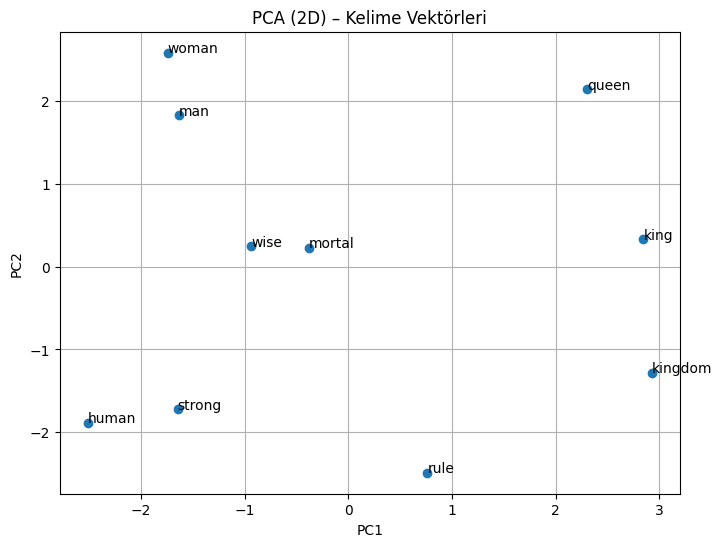

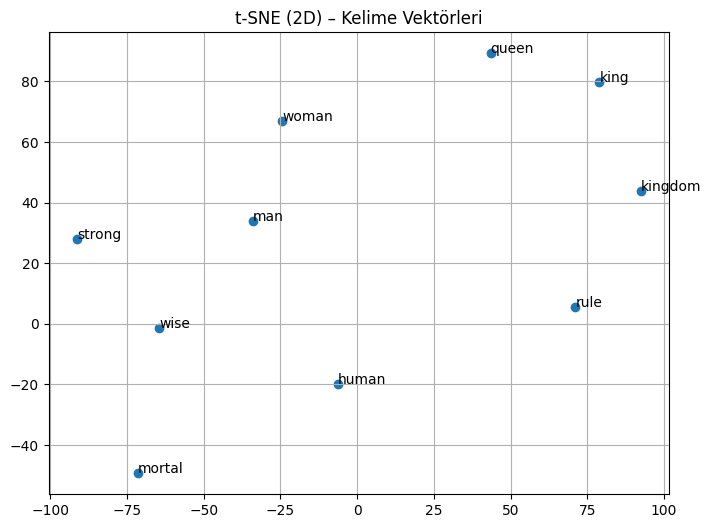

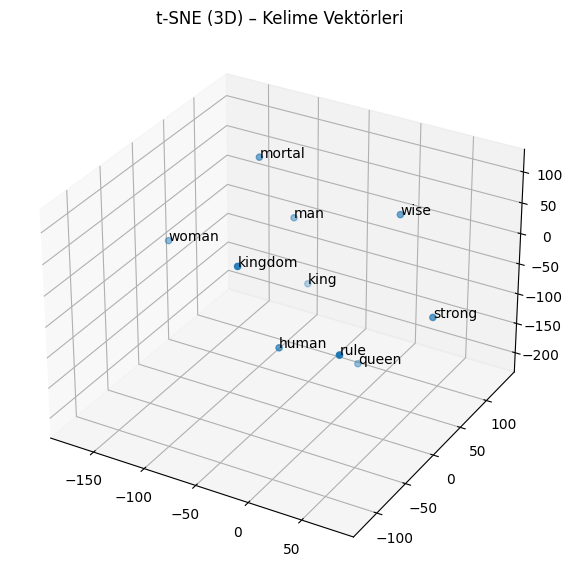

In [22]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# ✅ Model seçenekleri: word2vec_model, fasttext_model, glove_model
model =  glove_model #model #glove_model #fasttext_model #[ glove_model, model ]  # buraya model adını değiştirerek test edebilirsin

# Görselleştirilecek kelimeler (hepsi modelde olmalı)
#glove words = ["king", "queen", "man", "woman", "strong", "wise", "human", "rule", "mortal", "power", "kingdom"]
words = ["king", "queen", "man", "woman", "strong", "wise", "human", "rule", "mortal",  "kingdom"]


# Vektörleri topla
#glove_model.most_similar("king")
# word_vectors = np.array([model.wv[word] for word in words])
word_vectors = np.array([glove_model[word] for word in words])

# 1️⃣ PCA – 2D Görselleştirme
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))
plt.title("PCA (2D) – Kelime Vektörleri")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

# 2️⃣ t-SNE – 2D Görselleştirme
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
tsne_result = tsne.fit_transform(word_vectors)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1])
for i, word in enumerate(words):
    plt.annotate(word, xy=(tsne_result[i, 0], tsne_result[i, 1]))
plt.title("t-SNE (2D) – Kelime Vektörleri")
plt.grid(True)
plt.show()

# 3️⃣ t-SNE – 3D Görselleştirme
tsne_3d = TSNE(n_components=3, perplexity=5, random_state=42)
tsne_3d_result = tsne_3d.fit_transform(word_vectors)

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_3d_result[:, 0], tsne_3d_result[:, 1], tsne_3d_result[:, 2])
for i, word in enumerate(words):
    ax.text(tsne_3d_result[i, 0], tsne_3d_result[i, 1], tsne_3d_result[i, 2], word)
ax.set_title("t-SNE (3D) – Kelime Vektörleri")
plt.show()


**Kazanımlar:**

PCA: Varyansın en yüksek olduğu iki bileşen üzerinden lineer projeksiyon.

t-SNE: Lokal semantik kümelenmeleri gösteren daha sezgisel bir projeksiyon.

3D t-SNE: Daha yüksek boyutta (ör. 50d, 100d) vektörlerin topolojisini görselleştirme imkânı.



## 2.7.  BERT / GPT Ve Bağlamsal Embedding (Contextual Embedding)

In [23]:
!pip install transformers torch scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 51.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.9.41
    Uninstalling nvidia-nvjitlink-cu12-12.9.41:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.9.41
  Attempting uninstall: nvidia-curand-cu12
    Found existing installation: nvidia-curand-cu12 10.3.10.19
    Uninstalling nvidia-curand-cu12-10.3.10.19:
      Successfully uninstalled nvidia-curand-cu12-10.3.10.19
  Attempti

In [24]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# 1. BERT modeli ve tokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# 2. Bağlam cümleleri
sentence1 = "I deposited money at the bank."       # Finansal anlam
sentence2 = "The boat reached the river bank."     # Coğrafi anlam

# 3. Tokenize et
inputs1 = tokenizer(sentence1, return_tensors="pt")
inputs2 = tokenizer(sentence2, return_tensors="pt")

# 4. Modelden çıktılar
with torch.no_grad():
    outputs1 = model(**inputs1)
    outputs2 = model(**inputs2)

# 5. Tokenleri bul
tokens1 = tokenizer.convert_ids_to_tokens(inputs1["input_ids"][0])
tokens2 = tokenizer.convert_ids_to_tokens(inputs2["input_ids"][0])

# 6. "bank" kelimesinin indeksini bul
bank_index1 = tokens1.index("bank")
bank_index2 = tokens2.index("bank")

# 7. Bağlama duyarlı vektörleri çıkar
vec1 = outputs1.last_hidden_state[0, bank_index1, :].numpy()
vec2 = outputs2.last_hidden_state[0, bank_index2, :].numpy()

# 8. Kosinüs benzerliği hesapla
similarity = cosine_similarity([vec1], [vec2])[0][0]

# 9. Sonuç
print("Token dizisi 1:", tokens1)
print("Token dizisi 2:", tokens2)
print(f"'bank' kelimesinin bağlamlara göre benzerliği: {similarity:.4f}")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Token dizisi 1: ['[CLS]', 'i', 'deposited', 'money', 'at', 'the', 'bank', '.', '[SEP]']
Token dizisi 2: ['[CLS]', 'the', 'boat', 'reached', 'the', 'river', 'bank', '.', '[SEP]']
'bank' kelimesinin bağlamlara göre benzerliği: 0.5453


# 3. Örnek Uygulamalar :
# 3.1. Metin Sınıflandırma

In [25]:
# Gerekli kütüphaneler (sadece bir kez yüklenmeli)
# pip install gensim transformers scikit-learn torch

from gensim.models import Word2Vec, FastText
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
from transformers import AutoTokenizer, AutoModel
import torch

# 1. Veri seti
texts = [
    "I love this product", "This is an amazing movie",
    "I am very happy with the service", "I hate this thing",
    "This is the worst experience", "I am not happy with this",
]
labels = [1, 1, 1, 0, 0, 0]

# 2. Tokenize
tokenized = [text.lower().split() for text in texts]

# 3. Word2Vec Modeli
w2v_model = Word2Vec(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=1)
def w2v_embed(text):
    return np.mean([w2v_model.wv[w] for w in text.lower().split() if w in w2v_model.wv], axis=0)

# 4. FastText Modeli
ft_model = FastText(sentences=tokenized, vector_size=50, window=2, min_count=1, sg=1)
def fasttext_embed(text):
    return np.mean([ft_model.wv[w] for w in text.lower().split() if w in ft_model.wv], axis=0)

# 5. BERT Modeli
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
bert_model = AutoModel.from_pretrained("bert-base-uncased")
def bert_embed(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = bert_model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# 6. Özellik vektörleri
X_w2v = np.array([w2v_embed(t) for t in texts])
X_ft = np.array([fasttext_embed(t) for t in texts])
X_bert = np.array([bert_embed(t) for t in texts])

# 7. Model ve değerlendirme
def evaluate(X, y, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = LogisticRegression()
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)
    print(f"\n{name} – Classification Report:\n{classification_report(y_test, preds)}")

evaluate(X_w2v, labels, "Word2Vec")
evaluate(X_ft, labels, "FastText")
evaluate(X_bert, labels, "BERT")



Word2Vec – Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


FastText – Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0


BERT – Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00    

# 3.2. Bilgi Çekme ve Sıralama 

In [26]:
# Gerekli kütüphaneler (daha önce yüklenmiş olmalı)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import numpy as np

# =============================================================================
# 1. ADIM: Bilgi Havuzu (Knowledge Base) Oluşturma
# =============================================================================
# Bir bilgi havuzumuz olduğunu varsayalım. Bu, SSS (Sıkça Sorulan Sorular),
# ürün açıklamaları veya herhangi bir doküman koleksiyonu olabilir.

knowledge_base = [
    "To reset your password, navigate to the settings page and click 'Forgot Password'.",
    "You can download our mobile application from the Apple App Store or Google Play Store.",
    "Customer support is available 24/7 via live chat or by emailing support@example.com.",
    "We offer three pricing plans: Basic for individuals, Pro for teams, and Enterprise for large organizations.",
    "Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.",
    "Our refund policy allows for a full refund within 30 days of the original purchase.",
    "The new laptop model features a high-resolution display and a long-lasting battery.",
]

# =============================================================================
# 2. ADIM: Kullanıcı Sorgusu
# =============================================================================
# Bir kullanıcının bilgi almak için yazdığı sorgu.
user_query = "how can I change my plan?"

print(f"🔹 KULLANICI SORGUSU: '{user_query}'")
print("-" * 50)

# =============================================================================
# 3. ADIM: Vektörleştirme ve Benzerlik Hesaplama
# =============================================================================
# Farklı embedding tekniklerini kullanarak sorgu ile bilgi havuzundaki her bir
# doküman arasındaki anlamsal benzerliği hesaplayacağız.

# --- Yöntem 1: TF-IDF (Bağlamdan Yoksun, Anahtar Kelime Tabanlı) ---
try:
    tfidf = TfidfVectorizer()
    # Hem bilgi havuzunu hem de sorguyu aynı vektör uzayına dönüştür
    tfidf_matrix = tfidf.fit_transform(knowledge_base + [user_query])
    # Sorgu vektörü (son satır) ile diğer tüm dokümanların benzerliğini hesapla
    tfidf_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])[0]
except Exception as e:
    print(f"TF-IDF hatası: {e}")
    tfidf_sim = np.zeros(len(knowledge_base))

# --- Yöntem 2: Word2Vec (Bağlamdan Yoksun, Kelime Vektör Ortalaması) ---
try:
    tokenized_kb = [doc.lower().split() for doc in knowledge_base]
    w2v_model = Word2Vec(sentences=tokenized_kb, vector_size=100, window=5, min_count=1, sg=1)
    
    def get_w2v_vector(text, model):
        words = [w for w in text.lower().split() if w in model.wv]
        return np.mean([model.wv[w] for w in words], axis=0) if words else np.zeros(model.vector_size)

    query_vec_w2v = get_w2v_vector(user_query, w2v_model)
    kb_vecs_w2v = np.array([get_w2v_vector(doc, w2v_model) for doc in knowledge_base])
    w2v_sim = cosine_similarity([query_vec_w2v], kb_vecs_w2v)[0]
except Exception as e:
    print(f"Word2Vec hatası: {e}")
    w2v_sim = np.zeros(len(knowledge_base))


# --- Yöntem 3: Sentence-BERT (Bağlama Duyarlı, Cümle Seviyesinde) ---
# Bu model, tüm cümlenin bağlamını anlayarak tek bir embedding üretir.
# Bu, RAG sistemlerinin temelini oluşturur.
try:
    sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
    # Hem bilgi havuzunu hem de sorguyu vektörleştir
    embeddings = sbert_model.encode(knowledge_base + [user_query])
    query_embedding = embeddings[-1]
    kb_embeddings = embeddings[:-1]
    # Benzerliği hesapla
    sbert_sim = cosine_similarity([query_embedding], kb_embeddings)[0]
except Exception as e:
    print(f"Sentence-BERT hatası: {e}")
    sbert_sim = np.zeros(len(knowledge_base))


# =============================================================================
# 4. ADIM: Sonuçları Sıralama ve Gösterme
# =============================================================================
# Her yöntemin, kullanıcı sorgusuna en uygun bulduğu dokümanı görelim.

def display_results(method_name, similarities, docs):
    # Benzerlik skorlarına göre dokümanları sırala
    # `np.argsort` küçükten büyüğe sıraladığı için `[::-1]` ile ters çeviriyoruz.
    sorted_indices = np.argsort(similarities)[::-1]
    
    print(f"\n✅ {method_name} Sonuçları (En Uygun Dokümanlar):")
    # En iyi 3 sonucu gösterelim
    for i in range(min(3, len(sorted_indices))):
        idx = sorted_indices[i]
        print(f"  {i+1}. (Skor: {similarities[idx]:.4f}) -> '{docs[idx]}'")

display_results("TF-IDF", tfidf_sim, knowledge_base)
display_results("Word2Vec", w2v_sim, knowledge_base)
display_results("Sentence-BERT", sbert_sim, knowledge_base)

print("\n" + "=" * 50)
print("🔹 SONUÇ VE RAG İÇİN TEMEL 🔹")
print("Sentence-BERT gibi bağlama duyarlı modeller, 'plan' ve 'subscription' kelimelerinin")
print("anlamsal olarak ne kadar yakın olduğunu anladığı için en doğru sonucu bulur.")
print("RAG sistemleri, bu en uygun dokümanı bir dil modeline (LLM) bağlam olarak vererek")
print("doğal dilde, daha isabetli ve zengin cevaplar üretmesini sağlar.")
print("=" * 50)

🔹 KULLANICI SORGUSU: 'how can I change my plan?'
--------------------------------------------------


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


✅ TF-IDF Sonuçları (En Uygun Dokümanlar):
  1. (Skor: 0.0645) -> 'You can download our mobile application from the Apple App Store or Google Play Store.'
  2. (Skor: 0.0630) -> 'Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.'
  3. (Skor: 0.0000) -> 'The new laptop model features a high-resolution display and a long-lasting battery.'

✅ Word2Vec Sonuçları (En Uygun Dokümanlar):
  1. (Skor: 0.3975) -> 'Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.'
  2. (Skor: 0.3094) -> 'You can download our mobile application from the Apple App Store or Google Play Store.'
  3. (Skor: 0.2417) -> 'We offer three pricing plans: Basic for individuals, Pro for teams, and Enterprise for large organizations.'

✅ Sentence-BERT Sonuçları (En Uygun Dokümanlar):
  1. (Skor: 0.3283) -> 'Yes, you can upgrade, downgrade, or cancel your subscription at any time from your account dashboard.'
  2. (Skor: 0.1

# 3.3. Chat Bot'lar

In [27]:
!pip install sentence-transformers gensim scikit-learn

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 15.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.2
    Uninstalling scipy-1.15.2:
      Successfully uninstalled scipy-1.15.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
dopamine-rl 4.1.2 requires gymnasium>=1.0.0, but you have gymnasium 0.29.0 which is incompatible.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.2.2 which is incompatible.
plotnine 0.14.5 requires matplotlib>=3.8.0, but you have matplotlib 3.7.2 which is incompatible.
mlxte

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
import numpy as np

# Soru-Cevap verisi
faq_questions = [
    "How can I reset my password?",
    "Where can I download the mobile app?",
    "How to contact customer support?",
    "Tell me about your pricing plans.",
    "Can I upgrade my subscription?",
    "What is your refund policy?"
]

faq_answers = [
    "To reset your password, go to settings and click 'Forgot Password'.",
    "You can download the app from the App Store or Google Play.",
    "You can reach customer support via chat or email.",
    "We offer basic, pro, and enterprise pricing options.",
    "Yes, you can upgrade anytime from your account settings.",
    "We provide full refunds within 30 days of purchase."
]

user_query = "I want to change my plan and pay more."

# TF-IDF
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(faq_questions + [user_query])
tfidf_sim = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1])[0]

# Word2Vec
tokenized_faq = [q.lower().split() for q in faq_questions]
w2v_model = Word2Vec(sentences=tokenized_faq, vector_size=50, window=2, min_count=1, sg=1)
def mean_w2v(text):
    words = text.lower().split()
    vecs = [w2v_model.wv[w] for w in words if w in w2v_model.wv]
    return np.mean(vecs, axis=0)
query_vec = mean_w2v(user_query)
faq_vecs = np.array([mean_w2v(q) for q in faq_questions])
w2v_sim = cosine_similarity([query_vec], faq_vecs)[0]

# Sentence-BERT
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
sbert_vecs = sbert_model.encode(faq_questions + [user_query])
sbert_sim = cosine_similarity([sbert_vecs[-1]], sbert_vecs[:-1])[0]

# Karşılaştırma
def top_match(similarity, method):
    top_idx = np.argmax(similarity)
    print(f"\n🔹 {method} → En iyi eşleşme:")
    print(f" Soru:    {faq_questions[top_idx]}")
    print(f" Yanıt:   {faq_answers[top_idx]}")
    print(f" Skor:    {similarity[top_idx]:.3f}")

top_match(tfidf_sim, "TF-IDF")
top_match(w2v_sim, "Word2Vec")
top_match(sbert_sim, "Sentence-BERT")


Batches:   0%|          | 0/1 [00:00<?, ?it/s]


🔹 TF-IDF → En iyi eşleşme:
 Soru:    How to contact customer support?
 Yanıt:   You can reach customer support via chat or email.
 Skor:    0.123

🔹 Word2Vec → En iyi eşleşme:
 Soru:    Can I upgrade my subscription?
 Yanıt:   Yes, you can upgrade anytime from your account settings.
 Skor:    0.475

🔹 Sentence-BERT → En iyi eşleşme:
 Soru:    Tell me about your pricing plans.
 Yanıt:   We offer basic, pro, and enterprise pricing options.
 Skor:    0.428


**Kazanılmar**

Aynı ürün tanımına yönelik farklı embedding'lerin öneri sırasını nasıl etkilediğini gözlemleyebilir.

“Sound”, “audio”, “bass” gibi yakın kavramların bağlamda nasıl benzeştiğini veya ayrıştığını görebilir.

BERT gibi modellerin bağlama duyarlılığının pratik katkısını anlar.

## 3.4. Kendi Word Embedding’ini Eğitmek

Mevcut durumun tekrarı ve kısa bir hatırlama için :


--- Model Karşılaştırmaları: 'bank' kelimesine benzer kelimeler ---


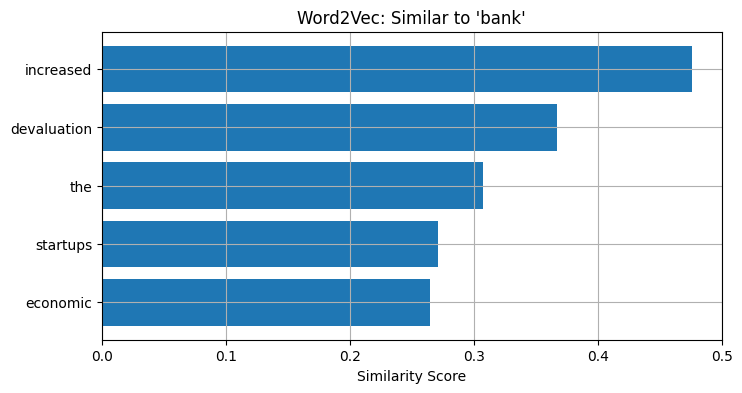

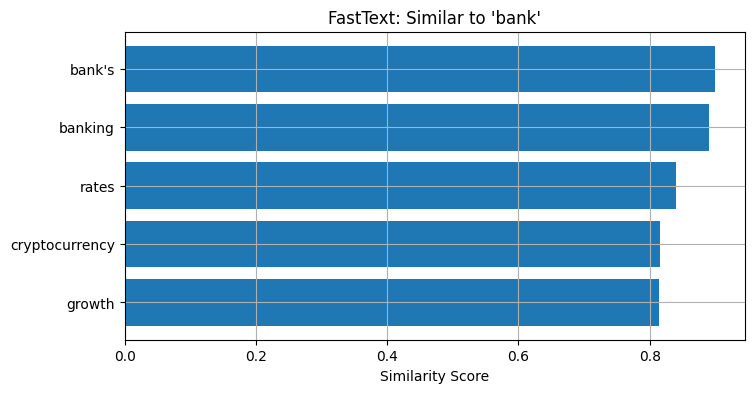

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

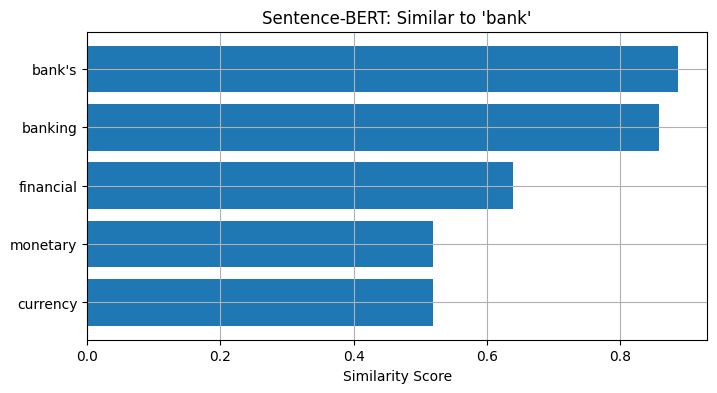


--- Hiperparametre Etkisi ---
No similar words found in: Word2Vec (min_count=2): Similar to 'bank'

--- Vektör Analojisi Örnekleri ---
'bank' is to 'banking' as 'financial' is to 'stock'
'bank' is to 'banking' as 'financial' is to 'artificial'
Not: Vektör analojisi, SBERT gibi bağlamsal modeller için doğrudan uygulanmaz.


In [29]:
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings("ignore") # Gereksiz uyarıları gizle

# 1. Sektörel örnek corpus (Finans metinleri)
corpus_text_list = [
    "The central bank increased interest rates due to inflation",
    "The financial markets responded with volatility",
    "Banking regulations have been updated by the authorities",
    "Investors are concerned about currency devaluation",
    "Cryptocurrency is becoming more mainstream in fintech",
    "The stock market closed at an all-time high",
    "There is a growing interest in sustainable investments",
    "Fintech startups are disrupting traditional banking",
    "The central bank's monetary policy affects economic growth",
    "Artificial intelligence is transforming financial services",
]
corpus = [sentence.lower().split() for sentence in corpus_text_list]

# 2. Word2Vec eğitimi (Skip-gram: sg=1)
w2v_model = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1, epochs=100)

# 3. FastText eğitimi
ft_model = FastText(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1, epochs=100, bucket=1000)

# 4. Sentence-BERT modelini yükleme
sbert_model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# ----------------- KODDAKİ DÜZELTMELER -----------------

# 4. Benzerlik fonksiyonları
# GENSIM MODELLERİ İÇİN FONKSİYON
def get_gensim_similarities(model, word="bank"):
    """Word2Vec ve FastText gibi Gensim modelleri için benzer kelimeleri bulur."""
    try:
        # .wv attribute'u burada kullanılır
        return model.wv.most_similar(word, topn=5)
    except KeyError:
        return []

# SBERT MODELİ İÇİN YENİ FONKSİYON
def get_sbert_similarities(model, corpus, word="bank", topn=5):
    """SentenceTransformer modeli için benzer kelimeleri bulur."""
    # Corpus'taki tüm eşsiz kelimeleri bul
    unique_words = sorted(list(set(w for s in corpus for w in s)))
    
    if word not in unique_words:
        return []
    
    # Tüm kelimeleri ve sorgu kelimesini vektöre çevir
    word_vectors = model.encode(unique_words)
    query_vector = model.encode([word])
    
    # Kosinüs benzerliğini hesapla
    similarities = cosine_similarity(query_vector, word_vectors)[0]
    
    # Sonuçları birleştirip sırala
    results = []
    for i, sim_score in enumerate(similarities):
        # Kelimenin kendisini listeye ekleme
        if unique_words[i] != word:
            results.append((unique_words[i], sim_score))
            
    results.sort(key=lambda x: x[1], reverse=True)
    
    return results[:topn]

# 5. Görselleştirme fonksiyonu (Değişiklik yok)
def plot_similarities(similarities, title):
    if similarities:
        words, scores = zip(*similarities)
        plt.figure(figsize=(8, 4))
        plt.barh(words[::-1], scores[::-1])
        plt.title(title)
        plt.xlabel("Similarity Score")
        plt.grid(True)
        plt.show()
    else:
        print(f"No similar words found in: {title}")

# 6. Benzer kelimeleri göster (Artık doğru fonksiyonları çağırıyoruz)
print("\n--- Model Karşılaştırmaları: 'bank' kelimesine benzer kelimeler ---")
plot_similarities(get_gensim_similarities(w2v_model, "bank"), "Word2Vec: Similar to 'bank'")
plot_similarities(get_gensim_similarities(ft_model, "bank"), "FastText: Similar to 'bank'")
# SBERT için yeni fonksiyonu çağır
plot_similarities(get_sbert_similarities(sbert_model, corpus, "bank"), "Sentence-BERT: Similar to 'bank'")

# 7. Hiperparametre örneği: min_count etkisi (Değişiklik yok)
print("\n--- Hiperparametre Etkisi ---")
w2v_mincount2 = Word2Vec(sentences=corpus, vector_size=50, window=5, min_count=2, sg=1, epochs=100)
plot_similarities(get_gensim_similarities(w2v_mincount2, "bank"), "Word2Vec (min_count=2): Similar to 'bank'")

# 8. Vektörel Analojiler (SBERT için bu fonksiyon geçerli değil)
def analogy(model, w1, w2, w3):
    """Gensim modelleri için vektör analojisi yapar."""
    try:
        result = model.wv.most_similar(positive=[w2, w3], negative=[w1], topn=1)
        print(f"'{w1}' is to '{w2}' as '{w3}' is to '{result[0][0]}'")
    except KeyError as e:
        print(f"Analogy error: Word not in vocabulary - {e}")

print("\n--- Vektör Analojisi Örnekleri ---")
analogy(w2v_model, "bank", "banking", "financial")
analogy(ft_model, "bank", "banking", "financial")
print("Not: Vektör analojisi, SBERT gibi bağlamsal modeller için doğrudan uygulanmaz.")

Kendi embedding'imizi eğitmek için : 

**Adımlar:**

Veri hazırlığı

Gensim ile model eğitimi

Modelden kelime vektörlerini alma

Modeli kaydetme ve yeniden yükleme

Benzerlik ve analoji örnekleri

Kullanım örnekleri (örneğin: metin sınıflandırma, tavsiye sistemi)



In [30]:
from gensim.models import Word2Vec
import os

# 1. ADIM: Veri Hazırlığı (tokenize edilmiş cümleler)
# Sektörel bir veri kümesi örneği (örneğin e-ticaret açıklamaları)
corpus = [
    "Buy wireless headphones with noise cancellation",
    "The laptop has 16GB RAM and 1TB SSD",
    "Check out our smart watches and fitness bands",
    "Noise cancelling over-ear headphones with deep bass",
    "Budget-friendly tablets and accessories on sale",
    "Gaming mouse with high DPI and RGB lighting",
    "Bluetooth speaker with surround sound",
    "High performance laptop for graphic design",
    "Affordable smart home gadgets",
    "Fitness bands with heart rate monitor",
]
# Hepsini küçük harfe çevirip tokenlere ayırıyoruz
tokenized_corpus = [sentence.lower().split() for sentence in corpus]

# 2. ADIM: Model Eğitimi
model = Word2Vec(
    sentences=tokenized_corpus,
    vector_size=100,       # her kelimenin vektör boyutu
    window=3,              # bağlam penceresi
    min_count=1,           # en az geçen kelimeler dahil olsun
    sg=1,                  # skip-gram (CBOW için sg=0)
    epochs=100             # eğitim süresi
)

# 3. ADIM: Kelime vektörleriyle benzerlik örneği
print("\nBenzer kelimeler (headphones):")
for word, score in model.wv.most_similar("headphones", topn=5):
    print(f"  {word:15s} → {score:.3f}")

# 4. ADIM: Modeli kaydetme
model_path = "my_custom_embedding.model"
model.save(model_path)
print(f"\nModel '{model_path}' dosyasına kaydedildi.")

# 5. ADIM: Modeli tekrar yükleme
loaded_model = Word2Vec.load(model_path)

# 6. ADIM: Analojik Anlam Testi (örnek çıkarım)
print("\nAnalojik çıkarım: 'laptop' is to 'performance' as 'mouse' is to ?")
try:
    result = loaded_model.wv.most_similar(positive=["performance", "mouse"], negative=["laptop"], topn=1)
    print("  Tahmin:", result[0][0])
except KeyError as e:
    print("  Eksik kelime:", e)

# 7. ADIM: Vektörleri başka uygulamalarda kullanmak (örnek)
vector = loaded_model.wv["headphones"]
print("\n'vector' değişkeni, 'headphones' kelimesinin 100 boyutlu embedding vektörüdür.")



Benzer kelimeler (headphones):
  rgb             → 0.274
  high            → 0.266
  laptop          → 0.223
  watches         → 0.218
  ram             → 0.204

Model 'my_custom_embedding.model' dosyasına kaydedildi.

Analojik çıkarım: 'laptop' is to 'performance' as 'mouse' is to ?
  Tahmin: lighting

'vector' değişkeni, 'headphones' kelimesinin 100 boyutlu embedding vektörüdür.
